## Problem Statement:
### Compare the result of any two image segmentation algorithm on the same image data set.

In [1]:
%matplotlib inline

import cv2
from cv2 import Mat
from matplotlib import pyplot as plt
import numpy as np

def cv2_imshow(image: Mat) -> None:
    plt.imshow(image)
    plt.show()


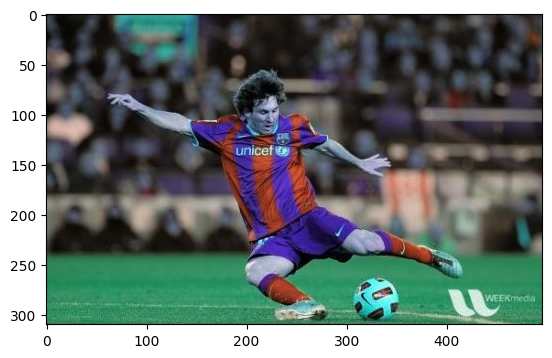

In [2]:
image_path = 'football_image.jpg'

image = cv2.imread(image_path)
cv2_imshow(image)

## 1) Threshold based image segmentation:
This code converts image to grayscale, and then applies a threshold to create a binary image. The threshold value is set to 120, and pixels with intensity values greater than 120 are set to 255 (white) while pixels with intensity values less than 120 are set to 0 (black).

In [3]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the threshold value
threshold_value = 120

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)


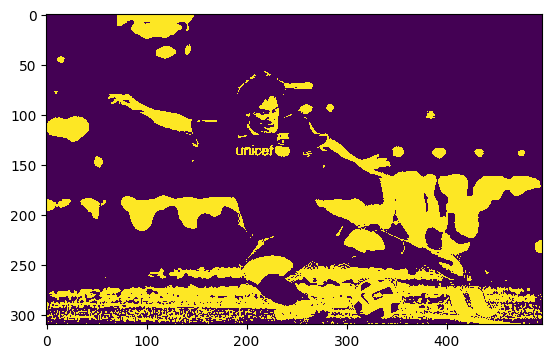

In [4]:
cv2_imshow(binary_image)

## 2) Watershed image segmentation:
This code performs the following steps:

Blur image to reduce noise.
Threshold the image to create a binary image.
Perform morphological opening to remove small objects.
Create masks for the background and foreground.
Find the markers for the watershed transformation.
Perform the watershed transformation.

In [5]:
# Blur the image to reduce noise
gray = cv2.GaussianBlur(gray, (5,5), 0)

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Create a kernel for the morphological operation
kernel = np.ones((3,3), np.uint8)

# Perform morphological opening to remove small objects
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Create a mask for the background
background_mask = cv2.dilate(opening, kernel, iterations=3)

# Create a mask for the foreground
foreground_mask = cv2.subtract(binary_image, opening)

# Find the markers for the watershed transformation
_, markers = cv2.connectedComponents(foreground_mask)

# Add one to all labels so that the background is not 0, but 1
markers += 1

# Set the background to 0
markers[background_mask == 255] = 0

# Perform the watershed transformation
segmentation = cv2.watershed(image, markers)

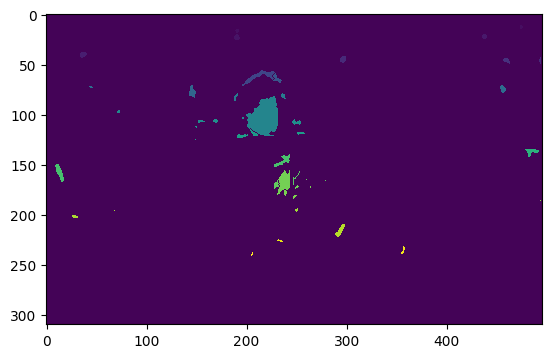

In [6]:
cv2_imshow(segmentation)